<a href="https://colab.research.google.com/github/frnkly/jayne-eats/blob/main/ml/notes/model-exploration-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Exploration using TensorFlow



# Data

In [344]:
# Dataset, organized as: [classification, consistency, temperature, [ingredients]].
raw_dataset = [
  # Pizzas
  [False, 'solid', 'warm', ['bell_pepper', 'cheese', 'flour', 'garlic', 'oil', 'olive', 'onion', 'salt', 'sugar', 'tomato']], # Olives
  [False, 'solid', 'warm', ['anchovy', 'bell_pepper', 'cheese', 'flour', 'garlic', 'mayonnaise', 'oil', 'olive', 'onion', 'salt', 'spinach', 'sugar']], # Anchovies
  [False, 'solid', 'warm', ['apple', 'coriander', 'cheese', 'flour', 'garlic', 'oil', 'onion', 'salt', 'sugar']], # Apple & goat cheese
  [True, 'solid', 'warm', ['arugula', 'bell_pepper', 'cheese', 'coriander', 'flour', 'garlic', 'oil', 'onion', 'salt', 'spinach', 'sugar', 'tomato']], # Arugula
  [True, 'solid', 'warm', ['bell_pepper', 'cheese', 'flour', 'garlic', 'mushroom', 'oil', 'onion', 'salt', 'sugar']], # Mushroom
  [True, 'solid', 'warm', ['cheese', 'flour', 'garlic', 'oil', 'onion', 'salt', 'sugar', 'tomato']], # Cheese

  # Products
  # [True, 'crunchy', 'normal', ['anise', 'baking_powder', 'egg', 'flour', 'oil', 'sugar']], # Biscotti
  # [True, 'crunchy', 'cool', ['almond', 'barley_malt', 'milk', 'rice', 'salt', 'sugar', 'wheat_bran', 'whole_grain_wheat']], # Vanilla almond Special K

  # Smoothies & milkshakes
  [True, 'chewy', 'cool', ['cookies', 'milk', 'skim_milk', 'sugar', 'vanilla']], # Oreo ice cream
  [False, 'thick', 'cool', ['blueberry', 'pineapple', 'strawberry']],
  [False, 'thick', 'cool', ['blueberry', 'kiwi', 'strawberry']],
  [False, 'thick', 'cool', ['chocolate', 'milk', 'vanilla']],
  [False, 'thick', 'cool', ['banana', 'chocolate', 'milk', 'vanilla']],
  [False, 'thick', 'cool', ['milk', 'strawberry', 'vanilla']],
  [True, 'thick', 'cool', ['banana', 'mango', 'pineapple']],
  [True, 'thick', 'cool', ['blueberry', 'kiwi', 'mango', 'pineapple']],
  [True, 'thick', 'cool', ['banana', 'milk', 'strawberry', 'vanilla']],
  [True, 'thick', 'cool', ['banana', 'milk', 'kiwi', 'vanilla']],

  # Soups & chilis
  [False, 'mashed', 'warm', ['bay_leaf', 'chickpea', 'chili', 'coriander', 'cumin', 'garlic', 'ginger', 'oil', 'onion', 'salt', 'tomato', 'tumeric']], # Chole chickpea curry
  [False, 'mashed', 'warm', ['black_pepper', 'chickpea', 'chili', 'coriander', 'cumin', 'garlic', 'ginger', 'oil', 'onion', 'potato', 'salt', 'spinach', 'tomato', 'tumeric']], # Sweet potato curry
  [True, 'mashed', 'warm', ['black_pepper', 'butter', 'cheese', 'coriander', 'garlic', 'potato', 'salt']], # Mash potatoes
  [True, 'mashed', 'warm', ['bean', 'black_pepper', 'carrot', 'chili', 'garlic', 'onion', 'potato', 'salt', 'tomato', 'tumeric']], # Chili
  [False, 'liquid', 'warm', ['black_pepper', 'butter', 'flour', 'garlic', 'onion', 'peanut', 'salt']], # Peanut soup
  [True, 'thick', 'warm', ['black_pepper', 'carrot', 'chili', 'garlic', 'onion', 'potato', 'salt', 'squash']], # Butternut squash soup

  # Miscellaneous (stuff made out of ingredients from above)
  [True, 'crunchy', 'normal', ['almond', 'apple', 'arugula', 'cranberry', 'oil', 'salt']], # Arugula salad
  [True, 'solid', 'warm', ['black_pepper', 'cheese', 'egg', 'garlic', 'mushroom', 'oil', 'onion', 'red_pepper', 'salt', 'spinach']], # Mushroom spinach omelet
  [True, 'solid', 'warm', ['bean', 'black_pepper', 'oil', 'onion', 'rice', 'salt', 'tumeric']], # Rice and beans
  [True, 'solid', 'warm', ['black_pepper', 'mushroom', 'oil', 'onion', 'pea', 'rice', 'salt']], # Riz djondjon
  [True, 'solid', 'cool', ['banana', 'butter', 'egg', 'flour', 'milk', 'salt', 'strawberry']], # Crepes
  [False, 'solid', 'warm', ['black_pepper', 'oil', 'okra', 'onion', 'rice', 'salt', 'spinach']], # Kalalou
]

RAW_LABEL_COL = 0
RAW_CONSISTENCY_COL = 1
RAW_TEMPERATURE_COL = 2
RAW_INGREDIENTS_COL = 3

print('Size of data set:', len(raw_dataset))

Size of data set: 28


In [345]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve

sns_colors = sns.color_palette('colorblind')
tf.random.set_seed(90128)


In [346]:
# Ingredients list.
ingredients_set = set()

for data in raw_dataset:
  ingredients_set |= set(data[RAW_INGREDIENTS_COL])

ingredients = sorted(list(ingredients_set))
print(f'Ingredients ({len(ingredients)}):', ingredients)

Ingredients (48): ['almond', 'anchovy', 'apple', 'arugula', 'banana', 'bay_leaf', 'bean', 'bell_pepper', 'black_pepper', 'blueberry', 'butter', 'carrot', 'cheese', 'chickpea', 'chili', 'chocolate', 'cookies', 'coriander', 'cranberry', 'cumin', 'egg', 'flour', 'garlic', 'ginger', 'kiwi', 'mango', 'mayonnaise', 'milk', 'mushroom', 'oil', 'okra', 'olive', 'onion', 'pea', 'peanut', 'pineapple', 'potato', 'red_pepper', 'rice', 'salt', 'skim_milk', 'spinach', 'squash', 'strawberry', 'sugar', 'tomato', 'tumeric', 'vanilla']


In [347]:
# Processed dataset.
processed_dataset = []
feature_names = ['consistency', 'temperature'] + ingredients

for data in raw_dataset:
  data_ingredients_set = set(data[RAW_INGREDIENTS_COL])
  processed_data = [
    1 if data[RAW_LABEL_COL] else 0,
    data[RAW_CONSISTENCY_COL],
    data[RAW_TEMPERATURE_COL],
  ]

  for ingredient in ingredients:
    processed_data.append('yes' if ingredient in data_ingredients_set else 'no')
  
  processed_dataset.append(processed_data)

dataset = pd.DataFrame(processed_dataset, columns=['label', *feature_names])
dataset_labels = dataset.pop('label')

dataset.head()

,consistency,temperature,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
0,solid,warm,no,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,yes,no,yes,yes,no,no,no,no,no,no,yes,no,no,no,no,yes,yes,no,no
1,solid,warm,no,yes,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,yes,no,no,no,yes,no,no,yes,no,yes,yes,no,no,no,no,no,no,yes,no,yes,no,no,yes,no,no,no
2,solid,warm,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no
3,solid,warm,no,no,no,yes,no,no,no,yes,no,no,no,no,yes,no,no,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,no,yes,no,no,yes,yes,no,no
4,solid,warm,no,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,yes,yes,no,no,yes,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no


In [348]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   consistency   28 non-null     object
 1   temperature   28 non-null     object
 2   almond        28 non-null     object
 3   anchovy       28 non-null     object
 4   apple         28 non-null     object
 5   arugula       28 non-null     object
 6   banana        28 non-null     object
 7   bay_leaf      28 non-null     object
 8   bean          28 non-null     object
 9   bell_pepper   28 non-null     object
 10  black_pepper  28 non-null     object
 11  blueberry     28 non-null     object
 12  butter        28 non-null     object
 13  carrot        28 non-null     object
 14  cheese        28 non-null     object
 15  chickpea      28 non-null     object
 16  chili         28 non-null     object
 17  chocolate     28 non-null     object
 18  cookies       28 non-null     object
 19  coriander 

In [349]:
dataset_labels.head()

0    0
1    0
2    0
3    1
4    1
Name: label, dtype: int64

In [350]:
dataset_labels.dtypes

dtype('int64')

In [351]:
# Split dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, dataset_labels)

TRAIN_DATASET_SIZE = y_train.size
TEST_DATASET_SIZE = y_test.size

print('Training set size:', y_train.size)
print('Testing set size:', y_test.size)

Training set size: 21
Testing set size: 7


In [352]:
# Training data.
X_train.head()

,consistency,temperature,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
22,crunchy,normal,yes,no,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no
2,solid,warm,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no
15,thick,cool,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
9,thick,cool,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
7,thick,cool,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,no,no


In [353]:
X_train.describe()

,consistency,temperature,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
count,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
unique,6,3,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,solid,warm,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no
freq,9,13,20,21,19,20,17,21,19,19,12,20,18,19,15,20,18,19,20,18,20,20,19,15,11,20,20,21,21,15,18,11,20,20,12,20,20,20,17,20,18,15,20,18,20,18,16,17,18,16


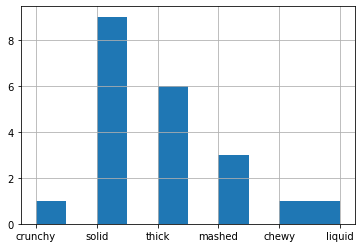

In [354]:
X_train.consistency.hist()

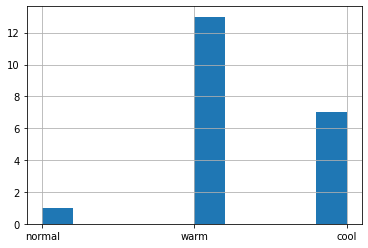

In [355]:
X_train.temperature.hist()

In [356]:
# Feature columns
feature_columns = []

for name in feature_names:
  vocabulary = dataset[name].unique()
  feature_columns.append(
      tf.feature_column.indicator_column(
          tf.feature_column.categorical_column_with_vocabulary_list(name, vocabulary)))

print('Feature columns:')
feature_columns

Feature columns:


[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='consistency', vocabulary_list=('solid', 'chewy', 'thick', 'mashed', 'liquid', 'crunchy'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='temperature', vocabulary_list=('warm', 'cool', 'normal'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='almond', vocabulary_list=('no', 'yes'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='anchovy', vocabulary_list=('no', 'yes'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='apple', vocabulary_list=('no', 'yes'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='arugula', voca

In [357]:
# Input functions
def make_input_fn(X, y, num_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((X.to_dict(orient='list'), y))
    
    if shuffle:
      dataset = dataset.shuffle(TRAIN_DATASET_SIZE)
  
    # For training, cycle thru dataset as many times as need (n_epochs=None).
    dataset = (dataset
      .repeat(num_epochs)
      .batch(TRAIN_DATASET_SIZE))
    
    return dataset
  
  return input_fn

def make_in_memory_input_fn(X, y):
  """
  Input function for in-memory training. In-memory input_fn does not use
  batching.
  """
  y = np.expand_dims(y, axis=1)

  def input_fn():
    return dict(X), y

  return input_fn

train_input_fn = make_input_fn(X_train, y_train)
in_memory_train_input_fn = make_in_memory_input_fn(X_train, y_train)
eval_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)


# [Linear Classifier](https://www.tensorflow.org/tutorials/estimator/linear)


## Estimators

In [358]:
# Linear estimator with default values.
linear_est_default = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est_default.train(train_input_fn, max_steps=100)
linear_est_default_result = linear_est_default.evaluate(eval_input_fn)

clear_output()
linear_est_default_result

{'accuracy': 0.42857143,
 'accuracy_baseline': 0.5714286,
 'auc': 0.5,
 'auc_precision_recall': 0.38913953,
 'average_loss': 0.95575994,
 'global_step': 100,
 'label/mean': 0.42857143,
 'loss': 0.95575994,
 'precision': 0.0,
 'prediction/mean': 0.28037053,
 'recall': 0.0}

In [359]:
# Linear estimator using the FTRL optimizer with regularization.
linear_est_ftrl_reg = tf.estimator.LinearClassifier(
    feature_columns,
    optimizer=tf.keras.optimizers.Ftrl(
      learning_rate=0.1,
      l1_regularization_strength=0.001,
    ))

linear_est_ftrl_reg.train(train_input_fn, max_steps=100)
linear_est_ftrl_reg_result = linear_est_ftrl_reg.evaluate(eval_input_fn)

clear_output()
linear_est_ftrl_reg_result

{'accuracy': 0.42857143,
 'accuracy_baseline': 0.5714286,
 'auc': 0.5,
 'auc_precision_recall': 0.38913953,
 'average_loss': 0.8480969,
 'global_step': 100,
 'label/mean': 0.42857143,
 'loss': 0.8480969,
 'precision': 0.0,
 'prediction/mean': 0.31152782,
 'recall': 0.0}

In [360]:
# Linear estimator using an optimizer with a learning rate decay.
linear_est_ftrl_decay = tf.estimator.LinearClassifier(
    feature_columns,
    optimizer=lambda: tf.keras.optimizers.Ftrl(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            decay_rate=0.96,
            decay_steps=10000,
            initial_learning_rate=0.1,
            name=None,
            staircase=False)))

linear_est_ftrl_decay.train(train_input_fn, max_steps=100)
linear_est_ftrl_decay_result = linear_est_ftrl_decay.evaluate(eval_input_fn)

clear_output()
linear_est_ftrl_decay_result

{'accuracy': 0.42857143,
 'accuracy_baseline': 0.5714286,
 'auc': 0.5,
 'auc_precision_recall': 0.38913953,
 'average_loss': 0.84776795,
 'global_step': 100,
 'label/mean': 0.42857143,
 'loss': 0.84776795,
 'precision': 0.0,
 'prediction/mean': 0.31169787,
 'recall': 0.0}

## Analysis

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6e1kr658/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


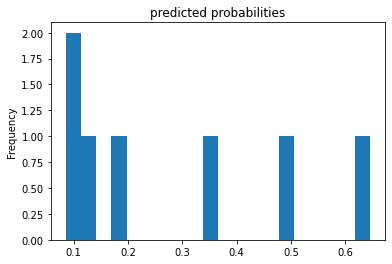

In [361]:
# Predicted probabilities.
linear_est = linear_est_default

linear_est_predictions = list(linear_est.predict(eval_input_fn))
linear_est_probabilities = pd.Series([pred['probabilities'][1] for pred in linear_est_predictions])

linear_est_probabilities.plot(kind='hist', bins=20, title='predicted probabilities')

(0.0, 1.05)

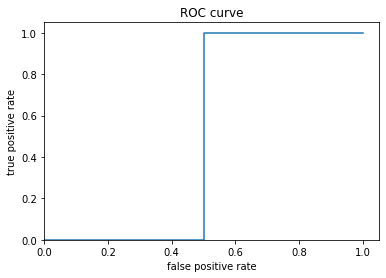

In [362]:
# ROC curve.

fpr, tpr, _ = roc_curve(y_test, linear_est_probabilities)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

# Boosted Trees

## Estimators

In [363]:
boosted_trees_est_default = tf.estimator.BoostedTreesClassifier(
    feature_columns,
    # "center_bias=True" forces the model to make an initial prediction before
    # using any features (e.g. use the mean of the training labels for
    # regression or log odds for classification when using cross entropy loss).
    # This is necessary for DFCs.
    center_bias=True,
    max_depth=3,
    n_batches_per_layer=1,
    n_trees=50,
    train_in_memory=True, 
)

# The model will stop training once the specified number of trees is built, not
# based on the number of steps.
boosted_trees_est_default.train(in_memory_train_input_fn, max_steps=100)

# Eval.
result = boosted_trees_est_default.evaluate(eval_input_fn)
clear_output()
print(pd.Series(result))

accuracy                  0.571429
accuracy_baseline         0.571429
auc                       0.458333
auc_precision_recall      0.355556
average_loss              1.269956
label/mean                0.428571
loss                      1.269956
precision                 0.500000
prediction/mean           0.350367
recall                    0.333333
global_step             100.000000
dtype: float64


## Analysis

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmprwydoen9/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


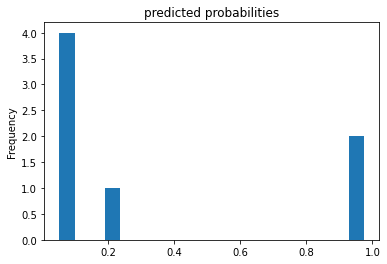

In [364]:
# Predicted probabilities.
boosted_trees_est = boosted_trees_est_default

boosted_trees_est_predictions = list(boosted_trees_est.predict(eval_input_fn))
boosted_trees_est_probabilities = pd.Series([pred['probabilities'][1] for pred in boosted_trees_est_predictions])

boosted_trees_est_probabilities.plot(kind='hist', bins=20, title='predicted probabilities')

(0.0, 1.05)

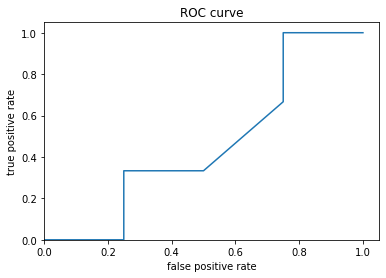

In [365]:
# ROC curve.

fpr, tpr, _ = roc_curve(y_test, boosted_trees_est_probabilities)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

# [Local Interpretability of Boosted Trees](https://www.tensorflow.org/tutorials/estimator/boosted_trees_model_understanding#local_interpretability)

In [366]:
boosted_trees_predictions = list(boosted_trees_est.experimental_predict_with_explanations(eval_input_fn))
labels = y_test.values
boosted_trees_probabilities = pd.Series([pred['probabilities'][1] for pred in boosted_trees_predictions])
boosted_trees_dfc = pd.DataFrame([pred['dfc'] for pred in boosted_trees_predictions])
boosted_trees_dfc.describe().T


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmprwydoen9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tens

,count,mean,std,min,25%,50%,75%,max
chocolate,7.0,0.067415,0.013704,0.050788,0.060972,0.062814,0.071261,0.093839
milk,7.0,0.003833,0.026836,-0.007003,-0.006523,-0.006425,-0.005688,0.064682
onion,7.0,-0.001625,0.050881,-0.058691,-0.051150,0.020349,0.034249,0.060768
coriander,7.0,-0.036365,0.148802,-0.291227,-0.085366,0.045161,0.046960,0.068321
almond,7.0,-0.162348,0.198481,-0.393960,-0.360004,-0.055380,0.000000,0.032914
butter,7.0,-0.059126,0.110209,-0.244086,-0.096654,-0.000569,-0.000403,0.024888
blueberry,7.0,-0.070042,0.168224,-0.316215,-0.145819,0.025084,0.027597,0.037284
spinach,7.0,-0.011698,0.069774,-0.131295,-0.037908,0.026141,0.030879,0.037326
flour,7.0,0.016040,0.016892,-0.008324,0.005761,0.023210,0.023942,0.037987
mushroom,7.0,-0.033025,0.008027,-0.038240,-0.036995,-0.036792,-0.033413,-0.015324


In [367]:
# Sum of DFCs + bias == probabality.
bias = boosted_trees_predictions[0]['bias']
dfc_prob = boosted_trees_dfc.sum(axis=1) + bias
np.testing.assert_almost_equal(dfc_prob.values, boosted_trees_probabilities.values)


In [368]:
# Boilerplate code for plotting :)

dfeval = X_test + y_test

def _get_color(value):
    """To make positive DFCs plot green, negative DFCs plot red."""
    green, red = sns.color_palette()[2:4]
    if value >= 0: return green
    return red

def _add_feature_values(feature_values, ax):
    """Display feature's values on left of plot."""
    x_coord = ax.get_xlim()[0]
    OFFSET = 0.15
    for y_coord, (feat_name, feat_val) in enumerate(feature_values.items()):
        t = plt.text(x_coord, y_coord - OFFSET, '{}'.format(feat_val), size=12)
        t.set_bbox(dict(facecolor='white', alpha=0.5))
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_weight('bold')
    t = plt.text(x_coord, y_coord + 1 - OFFSET, 'feature\nvalue',
    fontproperties=font, size=12)

def plot_example(example):
  TOP_N = 8 # View top 8 features.
  sorted_ix = example.abs().sort_values()[-TOP_N:].index  # Sort by magnitude.
  example = example[sorted_ix]
  colors = example.map(_get_color).tolist()
  ax = example.to_frame().plot(kind='barh',
                          color=[colors],
                          legend=None,
                          alpha=0.75,
                          figsize=(10,6))
  ax.grid(False, axis='y')
  ax.set_yticklabels(ax.get_yticklabels(), size=14)

  # Add feature values.
  _add_feature_values(dfeval.iloc[ID][sorted_ix], ax)
  return ax

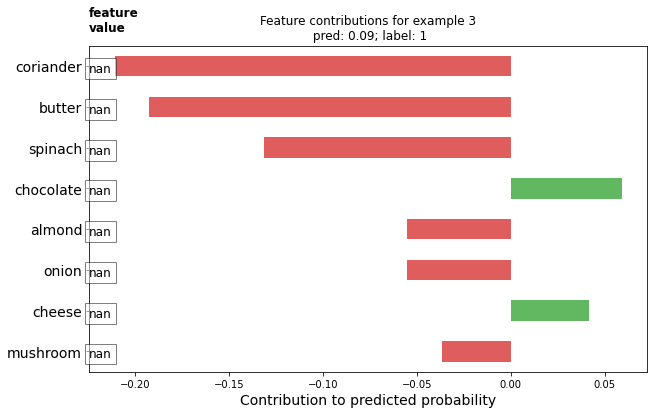

In [369]:
# Plot results.

# Index of example to choose.
boosted_trees_ID = 3

# Example in evaluation set.
example = boosted_trees_dfc.iloc[boosted_trees_ID]

# View top n features.
TOP_N = 8

sorted_ix = example.abs().sort_values()[-TOP_N:].index
ax = plot_example(example)
ax.set_title('Feature contributions for example {}\n pred: {:1.2f}; label: {}'\
             .format(boosted_trees_ID, boosted_trees_probabilities[boosted_trees_ID], labels[boosted_trees_ID]))
ax.set_xlabel('Contribution to predicted probability', size=14)
plt.show()


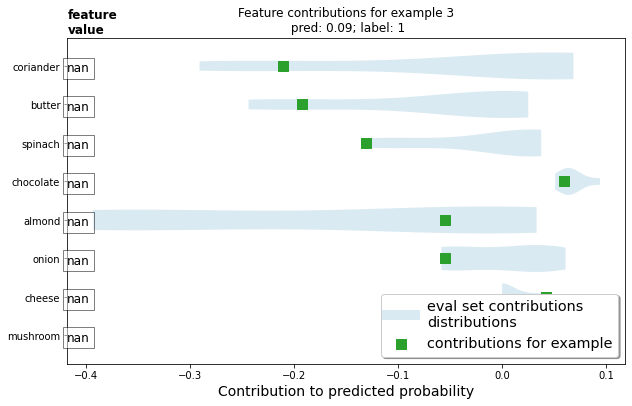

In [370]:
# Boilerplate plotting code.
def dist_violin_plot(df_dfc, ID):
  # Initialize plot.
  fig, ax = plt.subplots(1, 1, figsize=(10, 6))

  # Create example dataframe.
  TOP_N = 8  # View top 8 features.
  example = boosted_trees_dfc.iloc[ID]
  ix = example.abs().sort_values()[-TOP_N:].index
  example = example[ix]
  example_df = example.to_frame(name='dfc')

  # Add contributions of entire distribution.
  parts=ax.violinplot([df_dfc[w] for w in ix],
                 vert=False,
                 showextrema=False,
                 widths=0.7,
                 positions=np.arange(len(ix)))
  face_color = sns_colors[0]
  alpha = 0.15
  for pc in parts['bodies']:
      pc.set_facecolor(face_color)
      pc.set_alpha(alpha)

  # Add feature values.
  _add_feature_values(dfeval.iloc[ID][sorted_ix], ax)

  # Add local contributions.
  ax.scatter(example,
              np.arange(example.shape[0]),
              color=sns.color_palette()[2],
              s=100,
              marker="s",
              label='contributions for example')

  # Legend
  # Proxy plot, to show violinplot dist on legend.
  ax.plot([0,0], [1,1], label='eval set contributions\ndistributions',
          color=face_color, alpha=alpha, linewidth=10)
  legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large',
                     frameon=True)
  legend.get_frame().set_facecolor('white')

  # Format plot.
  ax.set_yticks(np.arange(example.shape[0]))
  ax.set_yticklabels(example.index)
  ax.grid(False, axis='y')
  ax.set_xlabel('Contribution to predicted probability', size=14)


dist_violin_plot(boosted_trees_dfc, boosted_trees_ID)
plt.title('Feature contributions for example {}\n pred: {:1.2f}; label: {}'\
             .format(boosted_trees_ID, boosted_trees_probabilities[boosted_trees_ID], labels[boosted_trees_ID]))
plt.show()


# [Global Interpretability of Boosted Trees](https://www.tensorflow.org/tutorials/estimator/boosted_trees_model_understanding#global_feature_importances)

In general, permutation feature importance are preferred to gain-based feature importance, though both methods can be unreliable in situations where potential predictor variables vary in their scale of measurement or their number of categories and when features are correlated ([source](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-9-307)). Check out [this article](http://explained.ai/rf-importance/index.html) for an in-depth overview and great discussion on different feature importance types.

## Gain-based feature importances

Gain-based feature importances measure the loss change when splitting on a particular feature

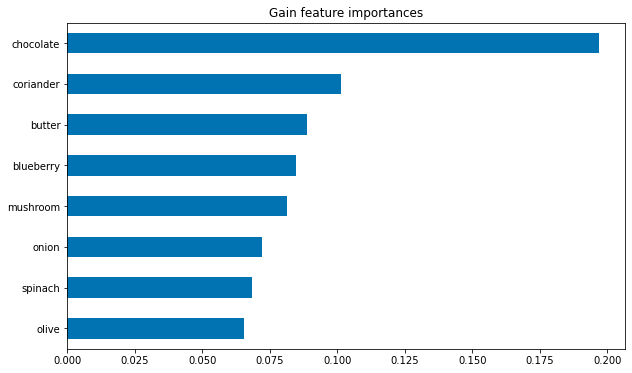

In [371]:
importances = boosted_trees_est.experimental_feature_importances(normalize=True)
df_imp = pd.Series(importances)

# Visualize importances.
N = 8
ax = (df_imp.iloc[0:N][::-1]
    .plot(kind='barh',
          color=sns_colors[0],
          title='Gain feature importances',
          figsize=(10, 6)))
ax.grid(False, axis='y')


## Average absolute DFCs

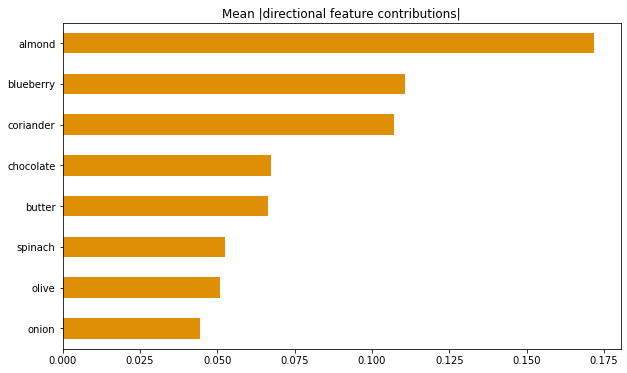

In [372]:
dfc_mean = boosted_trees_dfc.abs().mean()
N = 8
sorted_ix = dfc_mean.abs().sort_values()[-N:].index  # Average and sort by absolute.
ax = dfc_mean[sorted_ix].plot(kind='barh',
                       color=sns_colors[1],
                       title='Mean |directional feature contributions|',
                       figsize=(10, 6))
ax.grid(False, axis='y')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


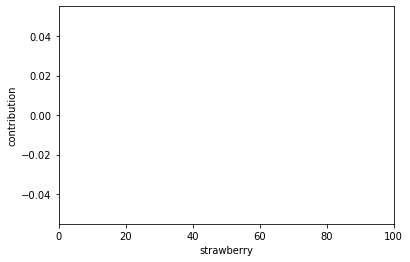

In [373]:
# You can also see how DFCs vary as a feature value varies.

FEATURE = 'strawberry'
feature = pd.Series(boosted_trees_dfc[FEATURE].values, index=dfeval[FEATURE].values).sort_index()
ax = sns.regplot(feature.index.values, feature.values, lowess=True)
ax.set_ylabel('contribution')
ax.set_xlabel(FEATURE)
ax.set_xlim(0, 100)
plt.show()


## Permutation feature importance

Permutation feature importances are computed by evaluating model performance on the evaluation set by shuffling each feature one-by-one and attributing the change in model performance to the shuffled feature.

Features:  ['consistency', 'temperature', 'almond', 'anchovy', 'apple', 'arugula', 'banana', 'bay_leaf', 'bean', 'bell_pepper', 'black_pepper', 'blueberry', 'butter', 'carrot', 'cheese', 'chickpea', 'chili', 'chocolate', 'cookies', 'coriander', 'cranberry', 'cumin', 'egg', 'flour', 'garlic', 'ginger', 'kiwi', 'mango', 'mayonnaise', 'milk', 'mushroom', 'oil', 'okra', 'olive', 'onion', 'pea', 'peanut', 'pineapple', 'potato', 'red_pepper', 'rice', 'salt', 'skim_milk', 'spinach', 'squash', 'strawberry', 'sugar', 'tomato', 'tumeric', 'vanilla']
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-31T18:25:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmprwydoen9/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.81447s
INFO:tensorflow:Finished evaluation at 2021-01-31-18:25:21
INFO:tensorflow:Saving dic

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-31T18:25:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmprwydoen9/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.85026s
INFO:tensorflow:Finished evaluation at 2021-01-31-18:25:24
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.5714286, accuracy_baseline = 0.57142854, auc = 0.4583334, auc_precision_recall = 0.35555574, average_loss = 1.2699565, global_step = 100, label/mean = 0.42857143, loss = 1.2699565, precision = 0.5, prediction/mean = 0.35036707, recall = 0.33333334
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: /tmp/tmprwydoen9/model.ckpt-100
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-31T18:25:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmprwydoen9/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.85326s
INFO:tensorflow:Finished evaluation at 2021-01-31-18:25:26
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.5714286, accuracy_baseline = 0.57142854, auc = 0.4583334, auc_precision_recall = 0.35555574, average_loss = 1.2699565, global_step = 100, label/mean = 0.42857143, loss = 1.2699565, precision = 0.5, prediction/mean = 0.35036707, recall = 0.33333334
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: /tmp/tmprwydoen9/model.ckpt-100
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-31T18:25:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restorin

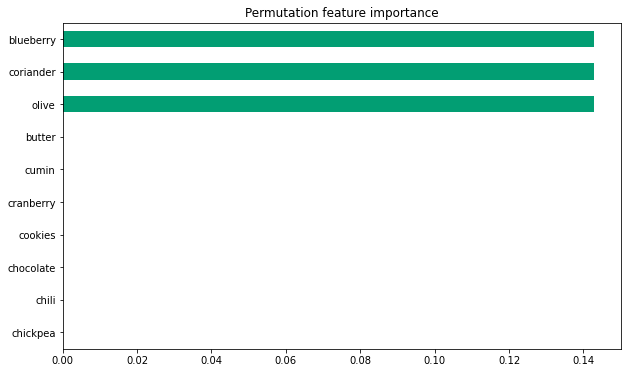

In [377]:
def permutation_importances(est, X_eval, y_eval, metric, features):
    """Column by column, shuffle values and observe effect on eval set.

    source: http://explained.ai/rf-importance/index.html
    A similar approach can be done during training. See "Drop-column importance"
    in the above article."""
    baseline = metric(est, X_eval, y_eval)
    imp = []

    for col in features:
        save = X_eval[col].copy()
        X_eval[col] = np.random.permutation(X_eval[col])
        m = metric(est, X_eval, y_eval)
        X_eval[col] = save
        imp.append(baseline - m)

    return np.array(imp)


def accuracy_metric(est, X, y):
    """TensorFlow estimator accuracy."""
    input_fn = make_input_fn(X, y, num_epochs=1, shuffle=False)
    pred = est.evaluate(input_fn)

    return pred['accuracy']


print('Features: ', feature_names)
importances = permutation_importances(boosted_trees_est, X_test, y_test, accuracy_metric, feature_names)
df_imp = pd.Series(importances, index=feature_names)

N = 10
sorted_ix = df_imp.abs().sort_values().index
ax = df_imp[sorted_ix][-N:].plot(kind='barh', color=sns_colors[2], figsize=(10, 6))
ax.grid(False, axis='y')
ax.set_title('Permutation feature importance')
plt.show()
